In [1]:
from sys import maxsize
import time


# import pickle
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import dill 
import random
import pickle
import sys
from utils import *
from ilbfs import *
from ilbfs_order import *
from RBFS import *
from RBFS_order import *

sys.setrecursionlimit(2000)
tracemalloc.stop()

In [3]:
goal_state = [1, 2, 3, 4, 5, 6, 7, 8, 0]
required_runs_per_bin = 10
target_bins = [1, 3, 5, 7, 9, 11, 13, 15]


random_state = [1, 2, 3, 4, 5, 6, 7, 8, 0]
rbfs_solution,  rbfs_memory, rbfs_runtime = recursive_best_first_search_with_order(random_state)

results = defaultdict(lambda: {
    'rbfs_runtime': [], 
    'ilbfs_sift_down_runtime': [], 
    'ilbfs_heapify_runtime': [], 
    'rbfs_memory': [], 
    'ilbfs_sift_down_memory': [], 
    'ilbfs_heapify_memory': [],

})




In [ ]:

# Generate data for each target bin
for n_actions in target_bins:
    while len(results[n_actions + 1]['rbfs_runtime']) < required_runs_per_bin:
        random_state = generate_random_state_from_goal(goal_state, n_actions)
        
        # RBFS
        rbfs_solution,  rbfs_memory, rbfs_runtime = recursive_best_first_search_with_order(random_state)
        rbfs_solution_length = len(rbfs_solution) if rbfs_solution else 0

        if rbfs_solution_length == n_actions + 1:
            # ILBFS with Sift Down
            ilbfs_sift_down_result, ilbfs_sift_down_memory, ilbfs_sift_down_runtime = ilbfs_with_order_sift_down(random_state)
            
            # ILBFS with Heapify
            ilbfs_heapify_result, ilbfs_heapify_memory, ilbfs_heapify_runtime = ilbfs_with_order_heapify(random_state)

            results[rbfs_solution_length]['rbfs_runtime'].append(rbfs_runtime)
            results[rbfs_solution_length]['ilbfs_sift_down_runtime'].append(ilbfs_sift_down_runtime)
            results[rbfs_solution_length]['ilbfs_heapify_runtime'].append(ilbfs_heapify_runtime)
            results[rbfs_solution_length]['rbfs_memory'].append(rbfs_memory)
            results[rbfs_solution_length]['ilbfs_sift_down_memory'].append(ilbfs_sift_down_memory)
            results[rbfs_solution_length]['ilbfs_heapify_memory'].append(ilbfs_heapify_memory)

            print(rbfs_solution_length)
            with open("search_results.pkl", "wb") as dill_file:
                dill.dump(results, dill_file)

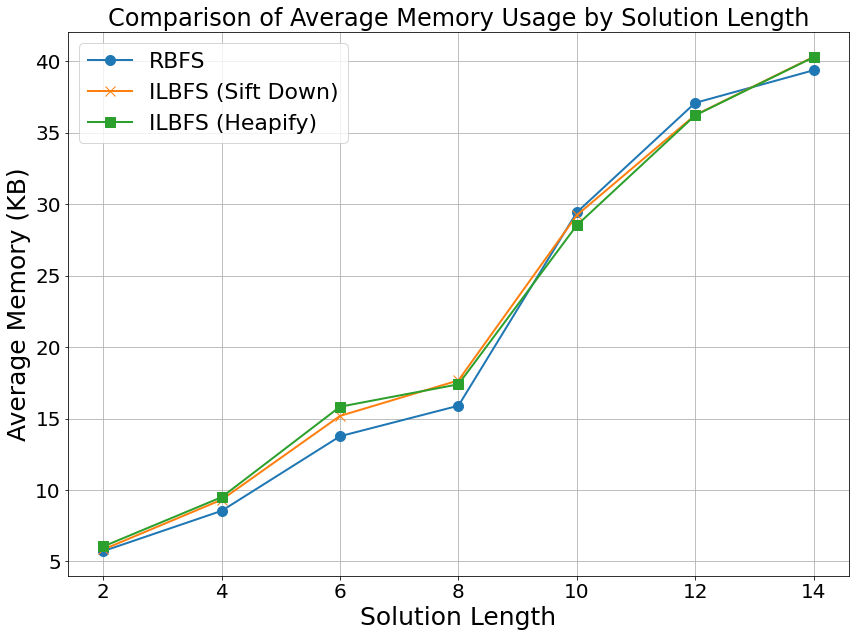

In [7]:
# Load results from the file
with open('search_results.pkl', 'rb') as f:
    results = dill.load(f)

# Convert bytes to kilobytes
for length, times in results.items():
    results[length]['rbfs_memory'] = [mem / 1024 for mem in times['rbfs_memory']]
    results[length]['ilbfs_sift_down_memory'] = [mem / 1024 for mem in times['ilbfs_sift_down_memory']]
    results[length]['ilbfs_heapify_memory'] = [mem / 1024 for mem in times['ilbfs_heapify_memory']]

# Calculate average memory usage
average_memory = {
    length: {
        'rbfs_memory': np.mean(times['rbfs_memory']),
        'ilbfs_sift_down_memory': np.mean(times['ilbfs_sift_down_memory']),
        'ilbfs_heapify_memory': np.mean(times['ilbfs_heapify_memory'])
    } for length, times in results.items() if len(times['rbfs_memory']) >= required_runs_per_bin
}

# Extract data for plotting
lengths = sorted(average_memory.keys())
rbfs_memory = [average_memory[length]['rbfs_memory'] for length in lengths]
ilbfs_sift_down_memory = [average_memory[length]['ilbfs_sift_down_memory'] for length in lengths]
ilbfs_heapify_memory = [average_memory[length]['ilbfs_heapify_memory'] for length in lengths]

# Create the plot
plt.figure(figsize=(14, 10))
plt.plot(lengths, rbfs_memory, label='RBFS', marker='o', markersize=10, linewidth=2)
plt.plot(lengths, ilbfs_sift_down_memory, label='ILBFS (Sift Down)', marker='x', markersize=10, linewidth=2)
plt.plot(lengths, ilbfs_heapify_memory, label='ILBFS (Heapify)', marker='s', markersize=10, linewidth=2)

plt.xlabel('Solution Length', fontsize=25)
plt.ylabel('Average Memory (KB)', fontsize=25)
plt.title('Comparison of Average Memory Usage by Solution Length', fontsize=24)
plt.legend(fontsize=22)
plt.grid(True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Save the plot to a PDF file
plt.savefig('average_memory_usage.pdf')

# Show the plot
plt.show()

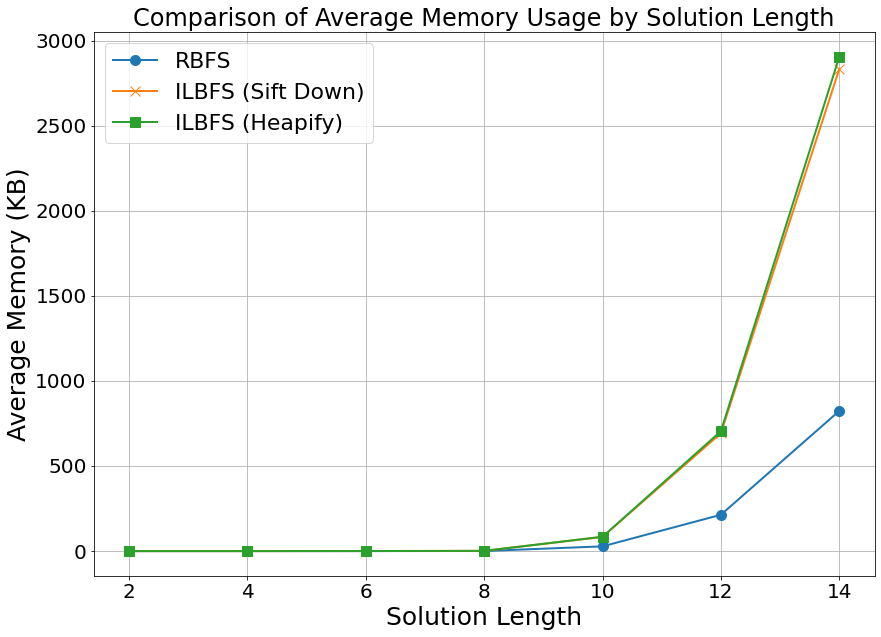

In [6]:
# Load results from the file
with open('search_results.pkl', 'rb') as f:
    results = dill.load(f)

# Calculate average runtimes
average_times = {
    length: {
        'rbfs_runtime': np.mean(times['rbfs_runtime']),
        'ilbfs_sift_down_runtime': np.mean(times['ilbfs_sift_down_runtime']),
        'ilbfs_heapify_runtime': np.mean(times['ilbfs_heapify_runtime'])
    } for length, times in results.items() if len(times['rbfs_runtime']) >= required_runs_per_bin
}

# Extract data for plotting
lengths = sorted(average_times.keys())
rbfs_times = [average_times[length]['rbfs_runtime'] for length in lengths]
ilbfs_sift_down_times = [average_times[length]['ilbfs_sift_down_runtime'] for length in lengths]
ilbfs_heapify_times = [average_times[length]['ilbfs_heapify_runtime'] for length in lengths]



# Create the plot
plt.figure(figsize=(14, 10))
plt.plot(lengths, rbfs_times, label='RBFS', marker='o', markersize=10, linewidth=2)
plt.plot(lengths, ilbfs_sift_down_times, label='ILBFS (Sift Down)', marker='x', markersize=10, linewidth=2)
plt.plot(lengths, ilbfs_heapify_times, label='ILBFS (Heapify)', marker='s', markersize=10, linewidth=2)

plt.xlabel('Solution Length', fontsize=25)
plt.ylabel('Average Memory (KB)', fontsize=25)
plt.title('Comparison of Average Memory Usage by Solution Length', fontsize=24)
plt.legend(fontsize=22)
plt.grid(True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Save the plot to a PDF file
plt.savefig('average_runetime.pdf')

# Show the plot
plt.show()